<a href="https://colab.research.google.com/github/fralfaro/MAT281_2024/blob/main/docs/labs/lab_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT281 - Laboratorio N°04


## Problema 01

<img src="https://cdni.iconscout.com/illustration/free/thumb/free-sales-team-illustration-download-in-svg-png-gif-file-formats--business-pack-illustrations-1730192.png" width = "300" align="center"/>


El conjunto de datos, denominado `company_sales_data.csv`, recoge las ventas mensuales de distintos productos de una empresa, ofreciendo una visión general de las unidades vendidas y los beneficios generados. Entre los productos incluidos se encuentran cremas faciales, jabones de baño y artículos para el cuidado capilar. Este conjunto de datos es útil para analizar el rendimiento de ventas y el comportamiento del mercado a lo largo del tiempo.

### Descripción de los Datos:

1. **month_number**: Número correspondiente al mes del año (1 para enero, 2 para febrero, etc.).
2. **facecream**: Cantidad de unidades de crema facial vendidas durante el mes.
3. **facewash**: Cantidad de unidades de limpiador facial vendidas durante el mes.
4. **toothpaste**: Cantidad de unidades de pasta de dientes vendidas durante el mes.
5. **bathingsoap**: Cantidad de unidades de jabón de baño vendidas durante el mes.
6. **shampoo**: Cantidad de unidades de champú vendidas durante el mes.
7. **moisturizer**: Cantidad de unidades de crema hidratante vendidas durante el mes.
8. **total_units**: Total de unidades vendidas de todos los productos en un mes dado.
9. **total_profit**: Ganancia total obtenida por la venta de todos los productos durante el mes, expresada en la moneda correspondiente.



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(10,8)})

In [2]:
# cargar datos
df = pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT281_2024/main/docs/labs/data/company_sales_data.csv")
df.head()

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer,total_units,total_profit
0,1,2500,1500,5200,9200,1200,1500,21100,211000
1,2,2630,1200,5100,6100,2100,1200,18330,183300
2,3,2140,1340,4550,9550,3550,1340,22470,224700
3,4,3400,1130,5870,8870,1870,1130,22270,222700
4,5,3600,1740,4560,7760,1560,1740,20960,209600


El **objetivo principal** es extraer la mayor cantidad de información posible de este conjunto de datos. Para lograrlo, se deben abordar las siguientes tareas. Para cada pregunta, deberá obtener una conclusión basada en los gráficos generados. Al finalizar todas las preguntas, se espera una conclusión general del análisis.

> **Nota:** Se permite el uso de las librerías Matplotlib o Seaborn para la visualización y análisis de los datos.




1. Lea la columna **`total_profit`** correspondiente a todos los meses y represente los datos utilizando un gráfico lineal y un gráfico de dispersión.


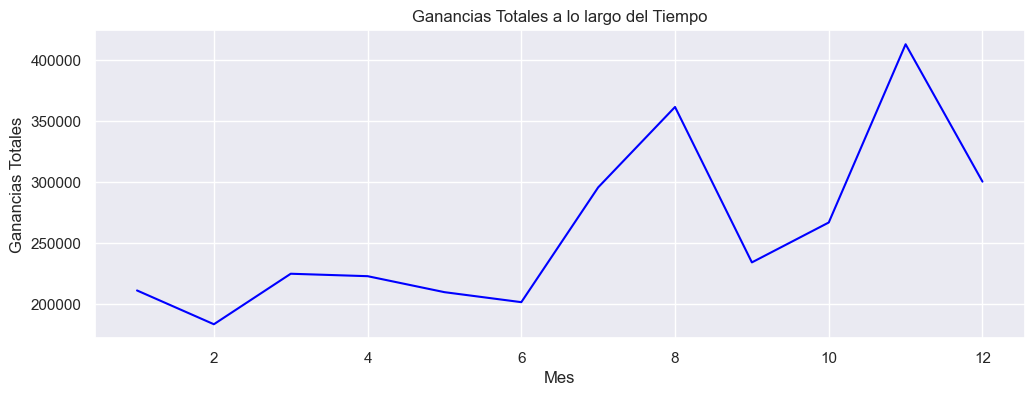

In [6]:
#1  lineas
df1 = df.copy()
# Crear el gráfico de línea
plt.figure(figsize=(12, 4))  # Definir el tamaño de la figura
sns.lineplot(
    data = df1,
    x='month_number', 
    y='total_profit', 
    color = 'blue'
)

# Personalizar el gráfico
plt.xlabel('Mes')
plt.ylabel('Ganancias Totales')
plt.title('Ganancias Totales a lo largo del Tiempo')

# Mostrar el gráfico
plt.show()

Podemos apreciar que en los meses 11 y 8 hubo una cantidad notoriamente mayor de ganancias totales, aunque con este gráfico solo se puede especular respecto a la razón, pues no tenemos información respecto a que meses fueron, ni que productos generaron estas ganancias.

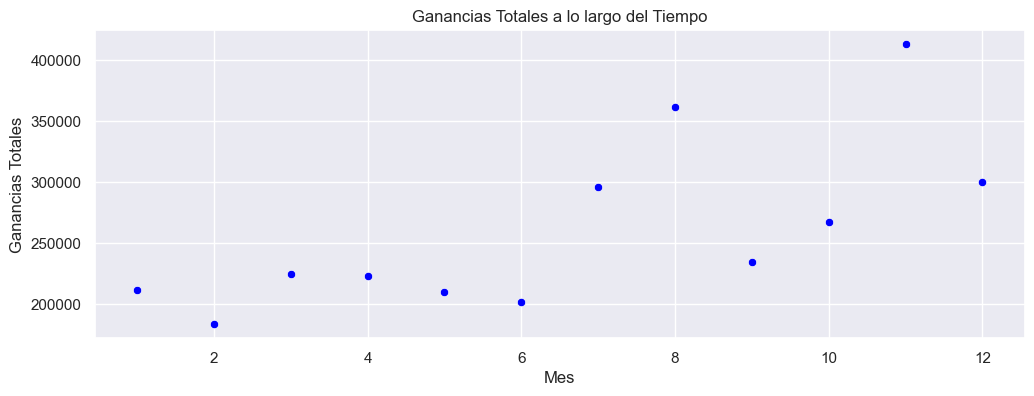

In [5]:
plt.figure(figsize=(12, 4))  # Definir el tamaño de la figura
sns.scatterplot(
    data = df1,
    x='month_number', 
    y='total_profit', 
    color = 'blue'
)

# Personalizar el gráfico
plt.xlabel('Mes')
plt.ylabel('Ganancias Totales')
plt.title('Ganancias Totales a lo largo del Tiempo')

# Mostrar el gráfico
plt.show()

La diferencia más notable entre los dos gráfico es en la forma en la que presentan la información,  puesto que aquí se nota que  la información es de  caracter discreto.

2. Lea los datos de ventas de todos los productos y represéntelos en un gráfico de líneas múltiples.


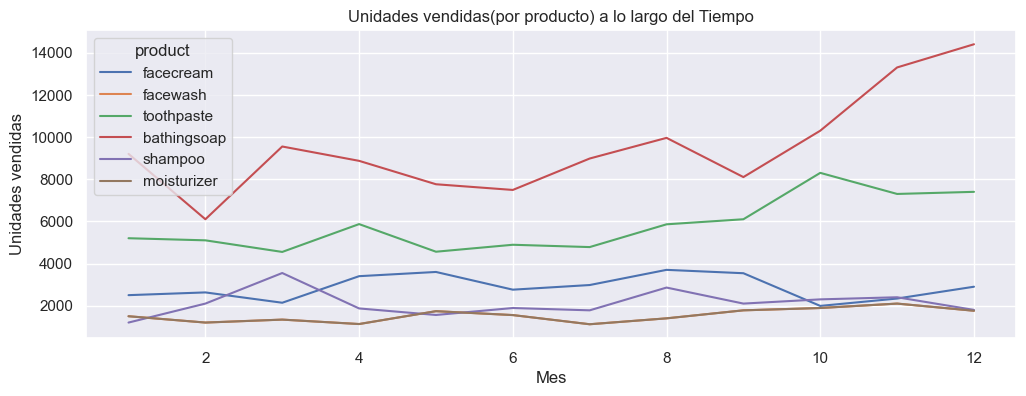

In [14]:
#2
df2 = df.loc[:,['month_number','facecream','facewash','toothpaste','bathingsoap','shampoo','moisturizer']]
df2 = df2.melt(
    id_vars=['month_number'], 
    value_vars=['facecream', 'facewash', 'toothpaste', 'bathingsoap', 'shampoo', 'moisturizer'],  
    var_name='product',         
    value_name='units_sold'
)
plt.figure(figsize=(12, 4))  
sns.lineplot(
    data = df2,
    x='month_number', 
    y='units_sold',
    hue= 'product',
    color = 'blue'
)

# Personalizar el gráfico
plt.xlabel('Mes')
plt.ylabel('Unidades vendidas')
plt.title('Unidades vendidas(por producto) a lo largo del Tiempo')

# Mostrar el gráfico
plt.show()

Aquí podemos notar que a lo largo de todos los meses el producto más vendido es el  jabon de baño, siendo segudo de cerca en algunos momentos po la pasta de dientes. El resto de los productos tuvieron ventas  bastante similares.

3. Lea los datos de ventas de **`facecream`** y **`facewash`** y represéntelos utilizando un gráfico de barras.

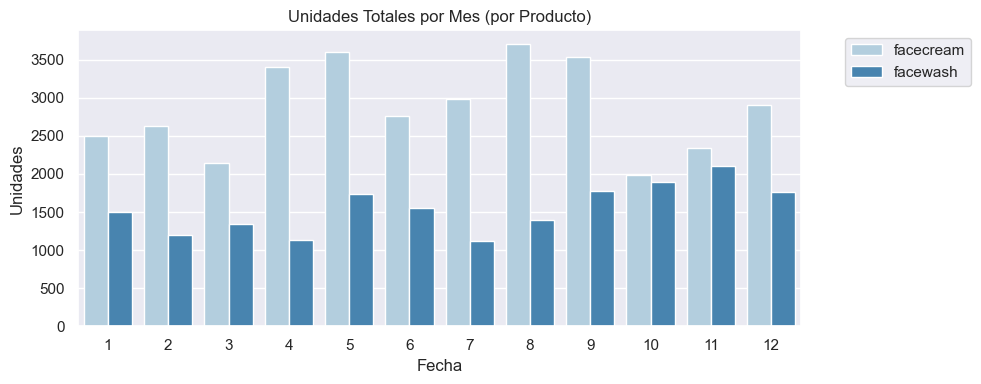

In [15]:
#3
df3 = df.loc[:,['month_number','facecream','facewash']]
df3 = df3.melt(
    id_vars=['month_number'], 
    value_vars=['facecream', 'facewash'],  
    var_name='product',         
    value_name='units_sold'
)
plt.figure(figsize=(10, 4))
sns.barplot(x='month_number', y='units_sold', data=df3, hue = 'product', palette = "Blues")

# Añadir título y etiquetas de los ejes
plt.title('Unidades Totales por Mes (facecream vs facewash)')
plt.xlabel('Fecha')
plt.ylabel('Unidades')

# Rotar los ticks del eje x para mejorar la legibilidad
plt.xticks(rotation=0)

# Mover la leyenda fuera del gráfico y colocarla a la derecha
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

De esta información podemos concluir que a lo largo del año hay mucha menos gente lavandose la cara que gente humectandose la cara, excepto en los meses 10 y 11.

4. Lea los datos de ventas de todos los productos y represéntelos utilizando un gráfico de caja (*box-plot*).


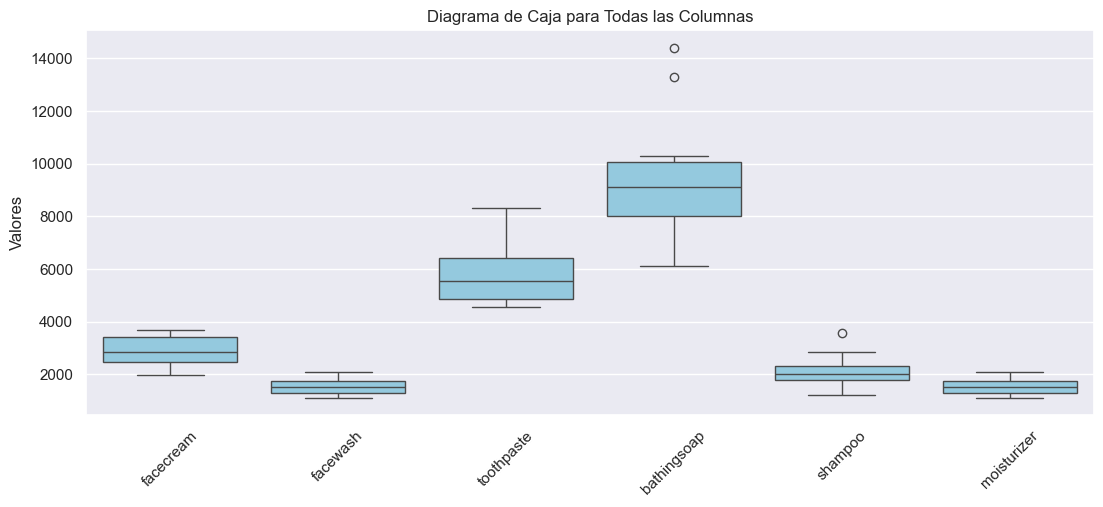

In [22]:
#4
df4 = df.drop(['month_number','total_profit','total_units'],axis=1)
# Crear el gráfico de diagrama de caja
plt.figure(figsize=(13, 5))  # Definir el tamaño de la figura
sns.boxplot(data=df4, color='skyblue')

# Personalizar el gráfico
plt.xlabel('')
plt.ylabel('Valores')
plt.title('Diagrama de Caja para Todas las Columnas')

# Rotar las etiquetas del eje x para una mejor legibilidad
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

Nuevamente podemos concluir que los dos productos más vendidos son el jabón de ducha y la pasta de dientes. Estos  tienen una tendenciía de vender  más de la mediana de sus ventas. También se puede concluir que los 4 productos menos vendidos tienen números consistentes. Por ejemplo se podría pensar que los clientes del humectante son clientes fieles, pero que este producto no atrae clientes nuevos.

5. Calcule las ventas totales del año pasado para cada producto y represéntelas utilizando un gráfico circular.

In [ ]:
#5
df_ventas_mes = df.loc[:,['facecream', 'facewash', 'toothpaste', 'bathingsoap', 'shampoo', 'moisturizer','total_profit']]

# Extraer los valores y los nombres de los productos
ventas = df_ventas_mes['total_profit']  # Valores de ventas del mes 1
productos = ['facecream', 'facewash', 'toothpaste', 'bathingsoap', 'shampoo', 'moisturizer']  # Nombres de los productos

df_ventas_mes
ventas = df_ventas_mes[['facecream', 'facewash', 'toothpaste', 'bathingsoap', 'shampoo', 'moisturizer']].sum()  # Suma total de cada producto
productos = ['facecream', 'facewash', 'toothpaste', 'bathingsoap', 'shampoo', 'moisturizer']  # Nombres de los productos

# Crear el gráfico circular
plt.pie(ventas,
        labels=productos,
        autopct='%1.1f%%',  # Muestra porcentajes
        startangle=90, 
        colors=sns.color_palette('mako'),
        textprops={'color': 'black', 'fontsize': 12})  # Usa la paleta de colores de Seaborn

# Asegurar que el gráfico sea circular
plt.axis('equal')

# Mostrar el gráfico
plt.show()